## Name : Aman Joharapurkar
## Roll No : A2-32
## Artficial Intelligence Lab
### Practical - 6
### Aim : Write a program to implement Decision Tree algorithm

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv("/content/play_tennis.csv")

In [49]:
dataset

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [50]:
dataset.head(2)

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No


In [51]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
dataset['outlook'] = Le.fit_transform(dataset['outlook'])
dataset['temp'] = Le.fit_transform(dataset['temp'])
dataset['humidity'] = Le.fit_transform(dataset['humidity'])
dataset['wind'] = Le.fit_transform(dataset['wind'])
dataset['play'] = Le.fit_transform(dataset['play'])
dataset['day'] = Le.fit_transform(dataset['day'])

In [52]:
dataset.head(3)

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1


In [53]:
X=dataset.drop('play',axis=1)
X

,day,outlook,temp,humidity,wind
0,0,2,1,0,1
1,6,2,1,0,0
2,7,0,1,0,1
3,8,1,2,0,1
4,9,1,0,1,1
5,10,1,0,1,0
6,11,0,0,1,0
7,12,2,2,0,1
8,13,2,0,1,1
9,1,1,2,1,1


In [54]:
columns_drop=['outlook','temp','humidity','wind']
Y=dataset.drop(columns=columns_drop,axis=1)
Y

,day,play
0,0,0
1,6,0
2,7,1
3,8,1
4,9,1
5,10,0
6,11,1
7,12,0
8,13,1
9,1,1


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
classifier = DecisionTreeClassifier(criterion='entropy')
model = classifier.fit(X_train,y_train)

In [57]:
model.predict(X_test)

array([[2, 1],
       [5, 0],
       [7, 1]])

In [58]:
y_test

,day,play
9,1,1
11,3,1
0,0,0


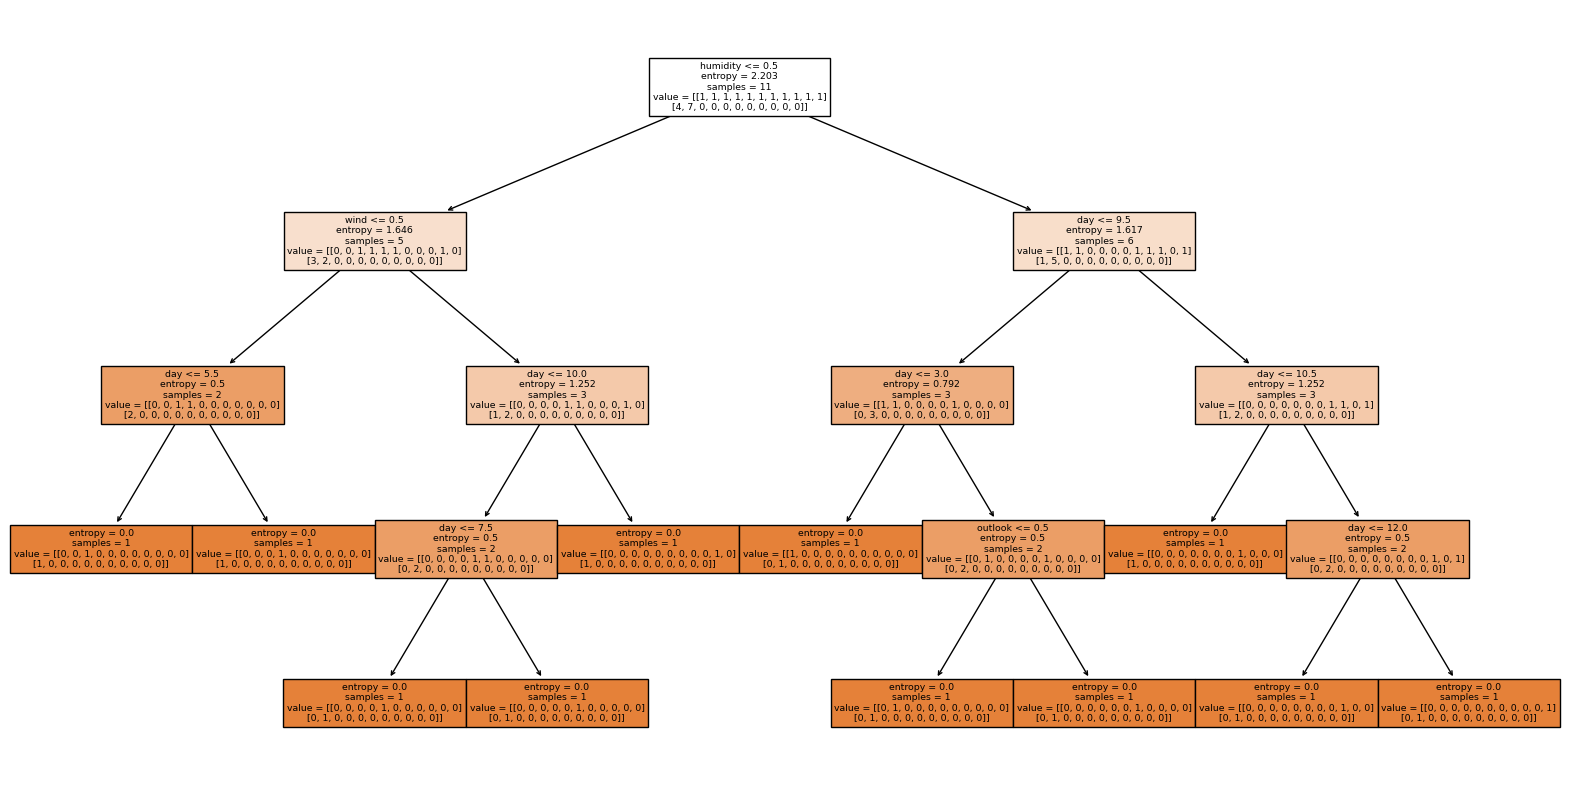

In [59]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()

X[0] -> Outlook   
X[1] -> Temperature    
X[2] -> Humidity   
X[3] -> Wind

In [80]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # Index of feature to split on
        self.threshold = threshold    # Threshold value for the feature
        self.left = left              # Left child (subtree)
        self.right = right            # Right child (subtree)
        self.value = value            # Value to return if node is a leaf

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.growTree(X, y, depth=0)

    def growTree(self, X, y, depth):
        if len(np.unique(y)) == 1:
            return Node(value=y[0])

        if self.max_depth is not None and depth >= self.max_depth:
            return Node(value=np.bincount(y).argmax())

        best_feature, best_threshold = self.bestSplit(X, y)
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_subtree = self.growTree(X[left_indices], y[left_indices], depth+1)
        right_subtree = self.growTree(X[right_indices], y[right_indices], depth+1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def bestSplit(self, X, y):
        best_entropy = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                entropy = self.Entropy(y[left_indices], y[right_indices])

                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def Entropy(self, left_y, right_y):
        p_left = len(left_y) / (len(left_y) + len(right_y))
        p_right = len(right_y) / (len(left_y) + len(right_y))

        entropy_left = self.calculateEntropy(left_y)
        entropy_right = self.calculateEntropy(right_y)

        entropy = p_left * entropy_left + p_right * entropy_right
        return entropy

    def calculateEntropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def predict(self, X):
        return np.array([self.traverseTree(x, self.tree) for x in X])

    def traverseTree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.traverseTree(x, node.left)
        else:
            return self.traverseTree(x, node.right)

X = np.array([[2, 1, 1, 0],
              [2, 1, 1, 1],
              [0, 1, 1, 0],
              [1, 2, 1, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 1],
              [0, 0, 0, 1],
              [2, 2, 1, 0]])
y = np.array([0, 0, 1, 1, 1, 0, 1, 0])  #0->no and 1->YES

classifier = DecisionTreeClassifier(max_depth=None)
classifier.fit(X, y)

X_test = np.array([[2, 1, 0, 0],  #Outlook: Rainy, Temp: Mild, Humidity: High, Wind: Weak
                   [1, 1, 1, 0]]) #Outlook: Sunny, Temp: Mild, Humidity: High, Wind: Weak

predictions = classifier.predict(X_test)
print(predictions)


[0 1]
